In [374]:
####### All required imports ########
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import display
import matplotlib
import os


In [375]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%config InlineBackend.figure_format = 'retina'
rc={'font.size': 22, 'axes.labelsize': 22, 'legend.fontsize': 22.0, 
    'axes.titlesize': 22, 'xtick.labelsize': 12, 'ytick.labelsize': 16,
    'font.family':'monospace', 'font.monospace': 'Courier New',
    'legend.fontsize': 15.0, 'figure.figsize': [11, 6]}
plt.rcParams.update(**rc)
sns.set(style='white', rc=rc)

In [376]:
###### Resolve the path of the data source #######
ROOT = r'../res/baseball'
# -----  team data ----- #
_salary = os.path.join(ROOT, 'Salaries.csv')
_master = os.path.join(ROOT, 'Master.csv')
_teams = os.path.join(ROOT, 'Teams.csv')

In [377]:
##### Read the data files #######
data_1 = pd.read_csv(_salary)
master = pd.read_csv(_master)
####### Creating data_1 and pulling the fileds form csvs that we need only #######
required_master_cols = ['playerID', 'nameFirst', 'nameLast', 'weight', 'height', 'bats', 'throws']
data_1 = data_1.merge(master[required_master_cols], on='playerID', how='inner')
data_1['fullName'] = data_1['nameFirst'] + ' ' + data_1['nameLast']


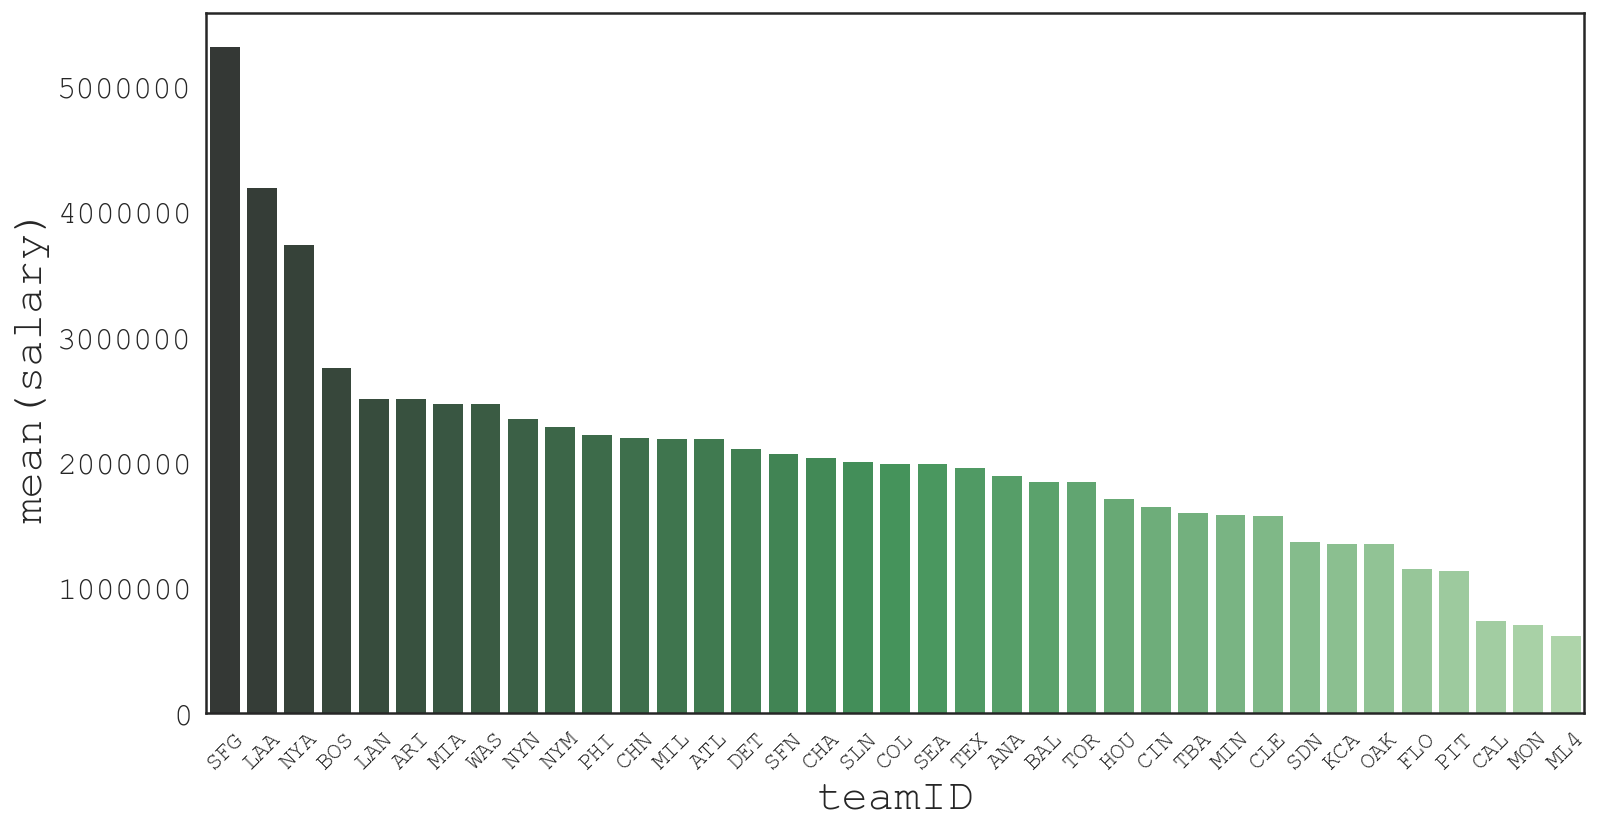

In [378]:
###### First we want to see how teams invested in their player #########

##### Clean and extract the fields we require #########
plt_data = data_1.groupby('teamID', as_index=False)['salary'].mean()
plt_data.sort_values(['salary'], ascending=False, inplace=True)
plt_data = plt_data.reset_index().drop('index', axis=1)
########################################################
#~~~~~~~~~~~~~~~  NOW PLOT THE DATA ~~~~~~~~~~~~~~~~~~#
ax = sns.barplot(x="teamID", y="salary", data=plt_data, palette="Greens_d")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Now we know that `SFG, LAA, NYA, BOS, LAN` are the top 5 teams in terms of spending money on their players. The next thing that we should do is to check what are top **players** in terms of salary and logically they should be from **these top teams**.

In [400]:
plot_data = data_1.groupby(['fullName'], as_index=False)['salary'].mean()
plot_data.sort_values(['salary'], inplace=True, ascending=False)
ten_most_expensive_players = plot_data.fullName.head(n=10)
their_clubs = []
g=data_1[data_1.fullName.isin(ten_most_expensive_players)].groupby(['fullName', 'teamID'])
for k, gr in g:
    their_clubs.append(k)

In [401]:
display(ten_most_expensive_players)
display(their_clubs)


3098    Masahiro Tanaka
117      Alex Rodriguez
3999        Ryan Howard
3072      Mark Teixeira
1251        Derek Jeter
639         CC Sabathia
1806      Hiroki Kuroda
3634     Prince Fielder
4385       Tim Lincecum
3227     Miguel Cabrera
Name: fullName, dtype: object

[('Alex Rodriguez', 'NYA'),
 ('Alex Rodriguez', 'SEA'),
 ('Alex Rodriguez', 'TEX'),
 ('CC Sabathia', 'CLE'),
 ('CC Sabathia', 'NYA'),
 ('Derek Jeter', 'NYA'),
 ('Hiroki Kuroda', 'LAN'),
 ('Hiroki Kuroda', 'NYA'),
 ('Mark Teixeira', 'ATL'),
 ('Mark Teixeira', 'NYA'),
 ('Mark Teixeira', 'TEX'),
 ('Masahiro Tanaka', 'NYA'),
 ('Miguel Cabrera', 'DET'),
 ('Miguel Cabrera', 'FLO'),
 ('Prince Fielder', 'DET'),
 ('Prince Fielder', 'MIL'),
 ('Prince Fielder', 'TEX'),
 ('Ryan Howard', 'PHI'),
 ('Tim Lincecum', 'SFG'),
 ('Tim Lincecum', 'SFN')]

In [360]:
plot_data['nameFirst'].unique()

array(['Alex', 'Derek', 'CC', 'Miguel', 'Mark', 'Prince', 'Ryan', 'Hiroki',
       'Tim', 'Masahiro'], dtype=object)

In [371]:
data_1

,yearID,teamID,lgID,playerID,salary,nameFirst,nameLast,weight,height,bats,throws,fullName
0,1985,ATL,NL,barkele01,870000,Len,Barker,225.000,77.000,R,R,Len Barker
1,1986,ATL,NL,barkele01,880000,Len,Barker,225.000,77.000,R,R,Len Barker
2,1987,ATL,NL,barkele01,890000,Len,Barker,225.000,77.000,R,R,Len Barker
3,1987,ML4,AL,barkele01,72500,Len,Barker,225.000,77.000,R,R,Len Barker
4,1988,ATL,NL,barkele01,900000,Len,Barker,225.000,77.000,R,R,Len Barker
5,1985,ATL,NL,bedrost01,550000,Steve,Bedrosian,200.000,75.000,R,R,Steve Bedrosian
6,1986,PHI,NL,bedrost01,650000,Steve,Bedrosian,200.000,75.000,R,R,Steve Bedrosian
7,1987,PHI,NL,bedrost01,1050000,Steve,Bedrosian,200.000,75.000,R,R,Steve Bedrosian
8,1988,PHI,NL,bedrost01,925000,Steve,Bedrosian,200.000,75.000,R,R,Steve Bedrosian
9,1989,PHI,NL,bedrost01,1450000,Steve,Bedrosian,200.000,75.000,R,R,Steve Bedrosian
